In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

En esta sesión veremos algunos algoritmos relacionados con gráficas

# Encontrar hojas

Dado un árbol, encuentra sus hojas. Recuerda que las hojas son aquellos vértices que tienen un único vecino, es decir, tienen grado 1.

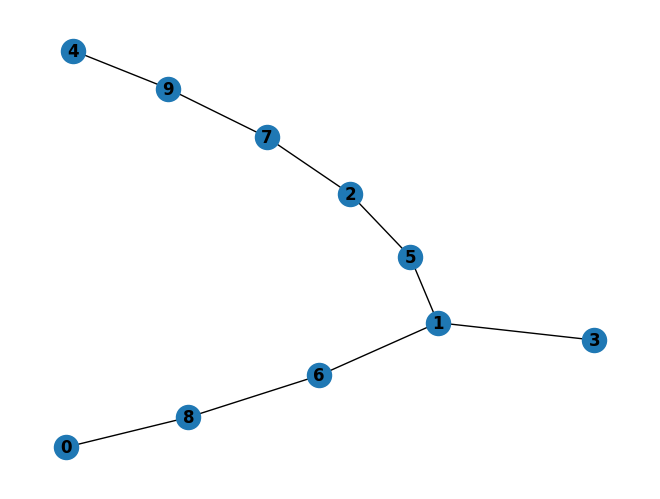

In [2]:
G = nx.random_tree(10)
nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
hojas = []
for v in G.nodes:
    if G.degree[v] == 1:
        hojas.append(v)
print(hojas)

[0, 3, 4]


Como las hojas tienen un único vecino, su grado es $1$, por lo que podemos aprovechar el atributo `degree` de la gráfica.

# Depth-first search (DFS)

Este algoritmo nos permite recorrer la gráfica por profundidad, es decir, dado un vértice inicial $v$, explora la gráfica la mayor distancia posible a lo largo de cada rama antes de regresar.

El recorrido de este algoritmo nos da un árbol, comúnmente llamado árbol de DFS, que suele ser muy útil.

Escribimos ahora nuestro algoritmo; lo definimos de manera recursiva:

In [4]:
def dfs(g, v, visited=None, dfs_path=None):
    if visited is None:
        visited = [False] * len(g.nodes)

    if dfs_path is None:
        dfs_path = []

    visited[v] = True

    dfs_path.append(v) # Aquí puede ir cualquier otra cosa que querramos hacer con cada vértice de la gráfica
    
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited, dfs_path)
    return dfs_path

Generamos una gráfica aleatoria para probarlo:

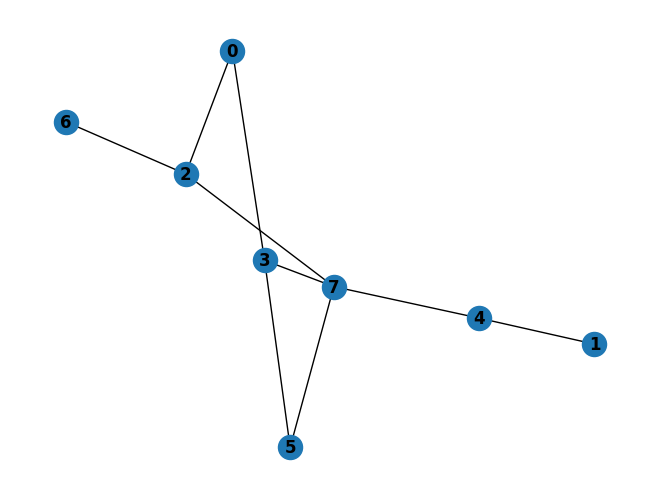

In [5]:
G = nx.gnp_random_graph(8, 1/3)
nx.draw(G, with_labels=True, font_weight='bold')

In [6]:
dfs(G, 0)

[0, 2, 6, 7, 3, 5, 4, 1]

También podemos implementar el algoritmo de manera iterativa:

In [7]:
def dfs_iterativo(g, v):


    dfs_path = []
    visitados = []
    pila = [v]

    while pila != []:
        v_actual = pila.pop()
        visitados.append(v_actual)
        dfs_path.append(v_actual)
        for u in g.adj[v_actual]:
            if u not in visitados and u not in pila:
                pila.append(u)
    return dfs_path

In [8]:
dfs_iterativo(G,0)

[0, 3, 7, 4, 1, 5, 2, 6]

# Número de componentes conexas

El algoritmo DFS puede ayudarnos a saber cuántas componentes conexas tiene una gráfica G. Basta iterar sobre los vértices de G: Si $v$ no ha sido marcado, aplicamos DFS sobre v y aumentamos el número de componentes conexas en 1. Si el vértice ya ha sido marcado, continuamos con la iteración.

In [9]:
def num_componentes_conexas(G):
    visitados = [False] * len(G.nodes)
    num_componentes_conexas = 0
    for v in range(len(G.nodes)):
        if visitados[v] == False:
            num_componentes_conexas = num_componentes_conexas + 1
            # visitados[v] = True
            dfs(G, v, visitados)
    return num_componentes_conexas

Probemos nuestro código en la siguiente gráfica:

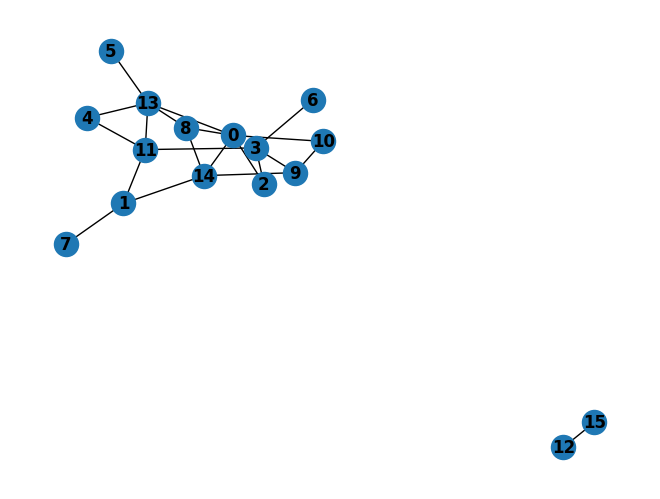

In [10]:
G = nx.gnp_random_graph(15, 1/5, seed=42)
G.add_node(15)
G.add_edge(15,12)
nx.draw(G, with_labels=True, font_weight='bold')

In [11]:
num_componentes_conexas(G)

2

## Altura de un árbol

Encontremos la altura de un árbol usando DFS; el procedimiento es bastante sencillo: todo lo que tenemos que hacer es calcular la altura de cada uno de los vértices, guardando el valor más alto encontrado en cada llamada recursiva:

In [12]:
def tree_height(
    g, # Gráfica a analizar
    v, # Vértice inicial
    heights = None, # Lista de alturas
    max_height = None # Altura máxima
):
    if heights is None:
        heights = [-1] * len(g.nodes)
        heights[v] = 0

    if max_height is None:
        max_height = [0] # La hacemos una lista para guardarla de manera sencilla a lo largo de llamadas recursivas

    for u in g.adj[v]:
        if heights[u] == -1:
            heights[u] = heights[v] + 1
            if max_height[0] < heights[u]:
                max_height[0] = heights[u]
            tree_height(g, u, heights, max_height)
    return max_height[0], heights

Otra manera de hacer esto sin tener que estar actualizando la altura máxima es simplemente calculando todas las alturas, y después obteniendo el máximo de la lista:

In [13]:
def tree_height_2(
    g, # Gráfica a analizar
    v, # Vértice inicial
    heights = None, # Lista de alturas
):
    if heights is None:
        heights = [-1] * len(g.nodes)
        heights[v] = 0

    for u in g.adj[v]:
        if heights[u] == -1:
            heights[u] = heights[v] + 1
            tree_height_2(g, u, heights)
    return max(heights), heights

El problema con esto es que tiene que iterar sobre toda la lista de alturas para encontrar el máximo, lo cual puede consumir mucho tiempo extra cuando se tengan muchos nodos.

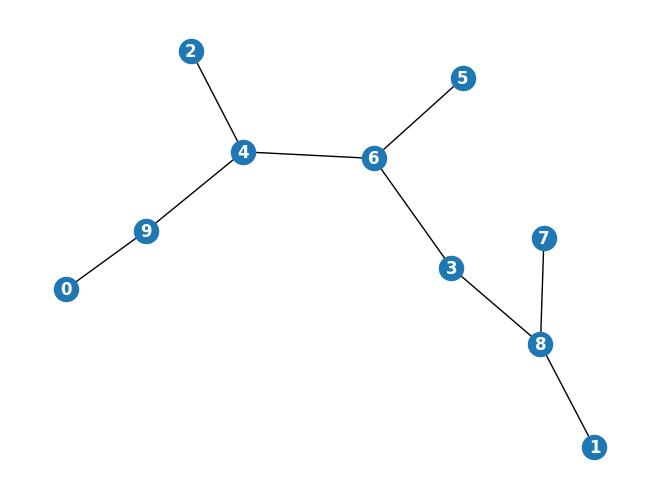

In [14]:
T = nx.random_tree(10)
nx.draw(T, with_labels=True, font_weight='bold', font_color="white")

In [15]:
m, h = tree_height(T, 0)
print(m)
print(h)

6
[0, 6, 3, 4, 2, 4, 3, 6, 5, 1]


## Coloreado

El colorear una gráfica consiste en asignar un color a cada nodo, de modo que cada par de nodos adyacentes tengan colores distintos. En 1976, se probó que para cualquier gráfica planar (i.e., que las aristas no se cruzan) se necesitan a lo mucho [cuatro colores](https://en.wikipedia.org/wiki/Four_color_theorem), aunque el algoritmo que implementaremos usa más colores que este óptimo.

El procedimiento es como sigue: recorremos la gráfica utilizando DFS. Si un nodo no está coloreado, significa que no lo hemos visitado, así que lo visitamos y lo coloreamos con el primer color que no tengan sus vecinos. Repetimos esto hasta que todos los nodos estén coloreados.

Por simplicidad, identificamos los colores como números del 0 en adelante. Escribimos una función para encontrar el primer color no utilizado, dada una lista de los colores adyacentes (en otras palabras, el número más pequeño distinto de todos los números dados):

In [16]:
def first_available_color(neighbor_colors):
    out = 0
    while True:
        if out not in neighbor_colors:
            return out
        out += 1

Luego, definimos una función para hacer DFS y colorear. Al final de la ejecución, regresa una lista con los índices de los colores de cada nodo:

In [17]:
def graph_coloring(g, v, visited=None):
    if visited is None:
        visited = [-1] * len(g.nodes)

    neighbor_colors = [ visited[n] for n in g.adj[v] ]
    new_color = first_available_color(neighbor_colors)
    visited[v] = new_color

    for u in g.adj[v]:
        if visited[u] == -1:
            graph_coloring(g, u, visited)

    return visited

Sin embargo, esta función no es suficiente. Para entender por qué, consideremos la siguiente gráfica:

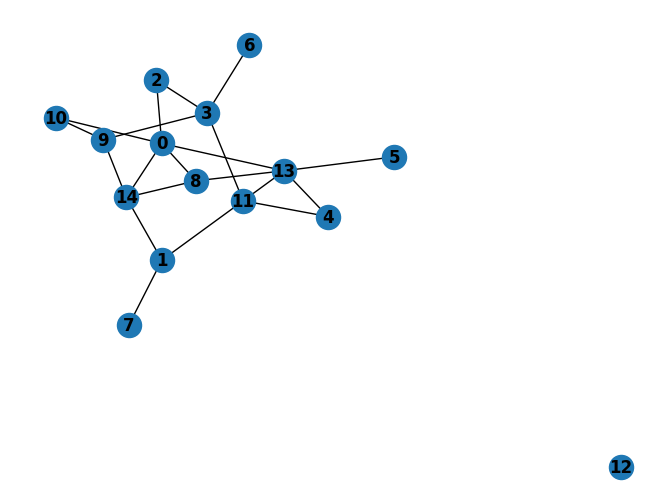

In [18]:
G = nx.gnp_random_graph(15, 1/5, seed=42)
nx.draw(G, with_labels=True, font_weight='bold')

Podemos ver que tiene dos componentes conexas. Si iniciamos el recorrido DFS del nodo 12, lo que pasará es que no podrá visitar la otra componente conexa, y por lo tanto no actualizará los colores de sus vértices. Comprobando que esto pasa:

In [19]:
graph_coloring(G, 12)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1]

Para resolver esto, escribimos una función que itere sobre cada entrada de la lista `visited`, y si ve alguna que es `-1` (i.e., el vértice correspondiente no ha sido visitado), llama la función `graph_coloring`. De esta manera, todas las componentes conexas se visitarán:

In [20]:
def super_graph_coloring(g, visited=None):
    if visited is None:
        visited = [-1] * len(g.nodes)

    for v, vis in enumerate(visited):
        if vis == -1:
            graph_coloring(g, v, visited)

    return visited

Repitiendo sobre la gráfica anterior:

In [21]:
node_colors = super_graph_coloring(G)
node_colors

[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2]

Ahora podemos ver que todos los vértices fueron visitados y coloreados apropiadamente.

Como bonus, mapeamos los índices a nombres de colores reales, y los utilizamos para graficar la gráfica:

In [22]:
color_names = ['red', 'green', 'blue', 'orange']
color_map = [None] * len(node_colors)
for i, c in enumerate(node_colors):
    color_map[i] = color_names[c]
color_map

['red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'red',
 'blue',
 'blue']

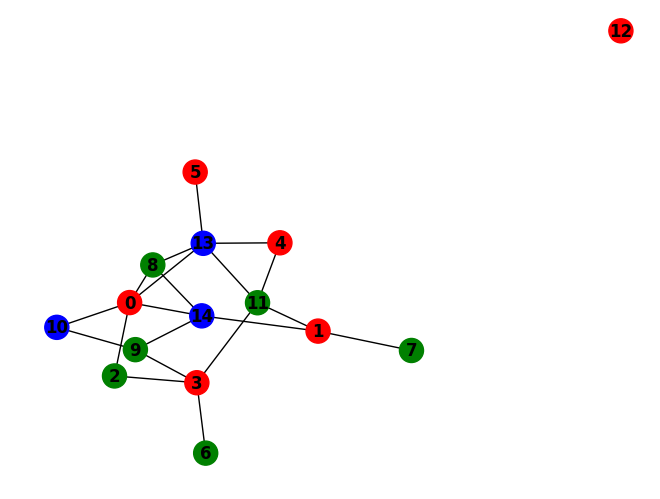

In [23]:
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map)

## Ciclos

¿Cómo detectar si una gráfica tiene algún ciclo? Para esto, recorremos la gráfica utilizando DFS, y en cada paso, vamos guardando el *padre* del vértice, i.e., el vértice en el que estábamos en el paso anterior. Si en algún momento estamos en un vértice que tenga un vértice adyacente que ya fue visitado, y que es distinto de su padre, entonces sabemos que existe un ciclo.

In [24]:
def dfs_cycle(g, v, parents=None, cycle=None):
    if cycle is None:
        cycle = [False]

    if parents is None:
        parents = [None] * len(g.nodes)
        parents[v] = v

    for u in g.adj[v]:
        if parents[u] is None:
            parents[u] = v
            dfs_cycle(g, u, parents, cycle)
        else:
            if parents[v] != u:
                cycle[0] = True

    return cycle[0]

Al igual que en el caso del coloreado, tenemos que tomar en cuenta la posibilidad de que existan distintas componentes conexas:

In [25]:
def has_cycle(g):
    parents = [None] * len(g.nodes)
    cycle = False
    for v in g.nodes:
        if parents[v] is None:
            parents[v] = v
            component_cycle = dfs_cycle(g, v, parents)
            cycle = cycle | component_cycle
    return cycle

Generamos una gráfica para probar nuestro algoritmo:

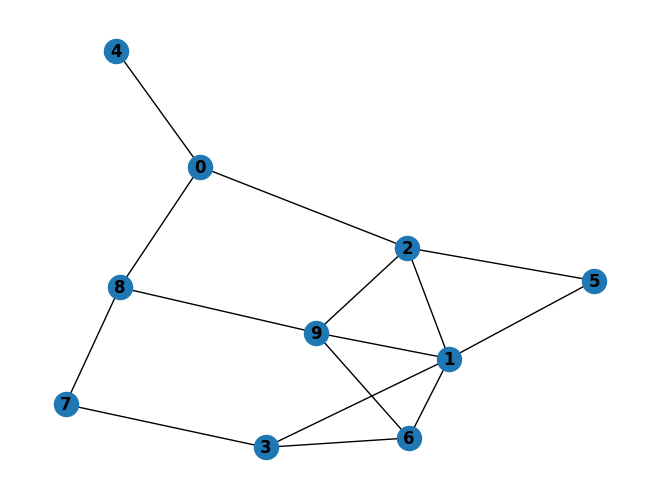

In [26]:
G = nx.gnp_random_graph(10, 1/4, seed=42)
nx.draw(G, with_labels=True, font_weight='bold')

In [27]:
has_cycle(G)

True

Luego, generamos un árbol:

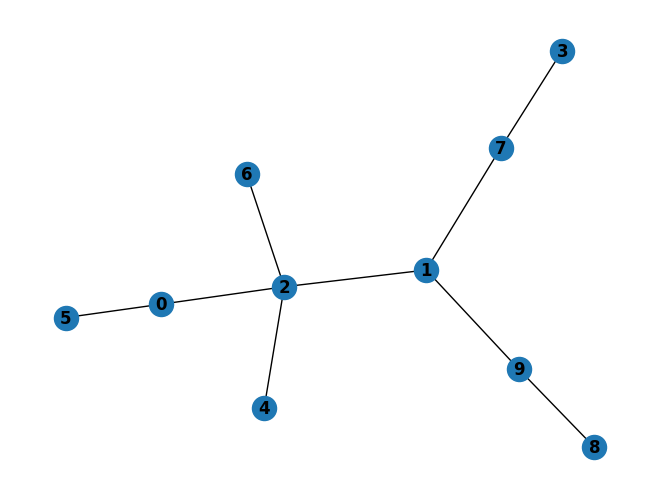

In [28]:
G = nx.random_tree(10)
nx.draw(G, with_labels=True, font_weight="bold")

Comprobando que no tiene ciclos:

In [29]:
has_cycle(G)

False

# Breadth-first search

Este algoritmos nos permite, a partir de cierto vértice recorrer la gráfica por anchura, es decir, irnos expandiendo a partir de un vértices inicial $v$, primero se visitan los vértices vecinos a $v$, después los vecinos de sus vecinos, y así sucesivamente.

Esto en particular nos permite conocer la distancia del vértice $v$ a cualquier otro vértice de la gráfica, lo cual no es posible con DFS. Además, el recorrido que se hace con este algoritmo nos da un árbol generador de la componente conexa en la que se encuentra el vértice de donde partimos.

Escribiremos un código por nuestra cuenta, por momento sin hacer uso de algoritmos de la librería NetworkX. Para esto, necesitaremos usar una estructura llamada **cola** (queue en inglés), cuya cualidad es que el primer objeto en ser insertado es el primero en ser eliminado.

In [30]:
from collections import deque

def bfs(g, v):
    visited = [False] * len(g.nodes)
    visited[v] = True

    q = deque()
    q.append(v)

    while q: # mientras q tenga elementos
        u = q.popleft()
        visited[u] = True
        
        print(u) # Pueden hacer lo que quieran
        
        for w in g.adj[u]:
            if not visited[w] and w not in q:
                q.append(w)

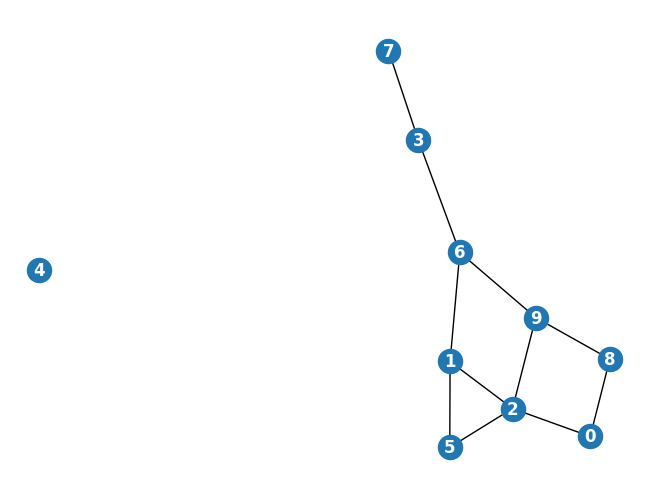

In [31]:
G = nx.gnp_random_graph(10, 1/5, seed=42)
nx.draw(G, with_labels=True, font_weight='bold', font_color="white")

In [32]:
bfs(G, 0)

0
2
8
1
5
9
6
3
7


## Caminos

¿Cómo podemos encontrar el camino más corto entre un par de vértices usando BFS?

Notemos que podemos hacer algunas ligeras modificaciones para lograr nuestro objetivo: en lugar de que `visited` guarde si ya vimos al vértice o no, crearemos una lista `parents` que guarde al vértice 'padre' de cada vértice que se vaya visitando, es decir, si $u$ es vecino de $v$ y $u$ no ha sido visitado en el recorrido de nuestro BFS, haremos `parents[u] = v`, indicando que justo para pasar a $u$ pasamos por $v$ previamente.

Notemos que al tener guardados estos 'padres' de los vértices podemos reconstruir fácilmente un camino de longitud mínima de entre `u` y `v`, pues basta con ir caminando sobre los padres de los vértices, comenzando por `v`, hasta llegar a `u`.

In [33]:
def bfs_parents(g, v):
    parents = [None] * len(g.nodes)
    parents[v] = v

    q = deque()
    q.append(v)

    while(q):
        u = q.popleft()
        for w in g.adj[u]:
            if parents[w] is None:
                parents[w] = u
                q.append(w)
    parents[v] = None
    return parents

Aplicándolo a la gráfica anterior, e imprimiendo los padres resultantes:

In [34]:
par = bfs_parents(G, 0)
for i, p in enumerate(par):
    print(f"{i} es hijo de {p}")

0 es hijo de None
1 es hijo de 2
2 es hijo de 0
3 es hijo de 6
4 es hijo de None
5 es hijo de 2
6 es hijo de 1
7 es hijo de 3
8 es hijo de 0
9 es hijo de 2


Naturalmente, si cambiamos el vértice inicial, las relaciones padre-hijo cambian:

In [35]:
par = bfs_parents(G, 7)
for i, p in enumerate(par):
    print(f"{i} es hijo de {p}")

0 es hijo de 2
1 es hijo de 6
2 es hijo de 1
3 es hijo de 7
4 es hijo de None
5 es hijo de 1
6 es hijo de 3
7 es hijo de None
8 es hijo de 9
9 es hijo de 6


Con esta lista de padres, podemos reconstruir un camino entre cualquier par de vértices. Empezamos en el vértice final, y vamos visitando su padre, luego el padre de su padre, y así sucesivamente hasta llegar al vértice inicial.

In [36]:
def path(g, start, end):
    parents = bfs_parents(g, start)
    if parents[end] is None: # No están en la misma componente conexa
        return []
    else:
        out = [end]
        while parents[end] != start:
            end = parents[end]
            out.append(end)
        out.append(start)
    return out

Usándolo para encontrar el camino entre el nodo 0 y el 7:

In [37]:
path(G, 0, 7)

[7, 3, 6, 1, 2, 0]

Y entre el 4 y el 7 (que no se encuentran en la misma componente conexa):

In [38]:
path(G, 4, 7)

[]

# Árboles generadores

El árbol generador de una gráfica $G$ es un árbol que contiene todos los vértices de $G$. Podemos usar DFS (o BFS) para producirlo de la siguiente manera:

1. Caminamos toda la gráfica y obtenemos los padres de cada vértice.
2. Insertamos una arista entre hijo y su padre.

Al árbol resultante se le conoce como árbol DFS (BFS).

Dado que ya tenemos una función para generar los padres con BFS (`bfs_parents`), escribimos una para hacerlo usando DFS:

In [39]:
def dfs_parents(g, v, parents=None):
    if parents is None:
        parents = [None] * len(g.nodes)
        parents[v] = v

    for u in g.adj[v]:
        if parents[u] is None:
            parents[u] = v
            dfs_parents(g, u, parents)
    return parents

Luego, escribimos una función para generar un árbol dada una lista de parentezco:

In [40]:
def tree_from_parents(g, parents):
    tree = nx.Graph()
    tree.add_nodes_from(g.nodes)
    for child, parent in enumerate(parents):
        if child is not None and parent is not None and child != parent:
            tree.add_edge(child, parent)
    return tree

Generamos una gráfica de prueba:

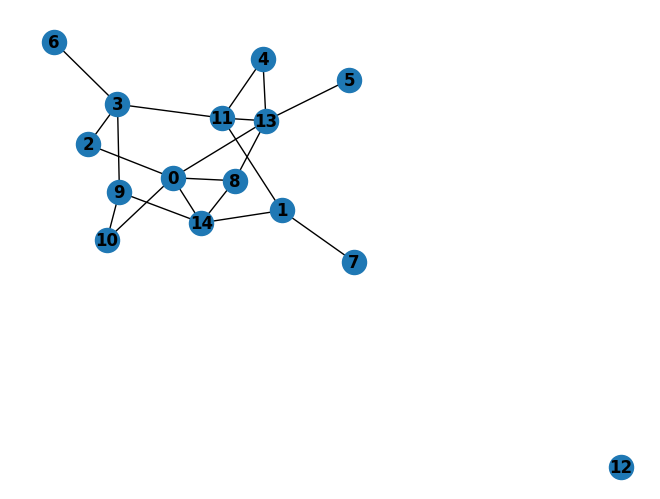

In [41]:
G = nx.gnp_random_graph(15, 1/5, seed=42)
nx.draw(G, with_labels=True, font_weight='bold')

Calculamos sus parentezcos con BFS y DFS:

In [42]:
bfs_par = bfs_parents(G, 0)
dfs_par = dfs_parents(G, 0)

Generamos los árboles:

In [43]:
bfs_tree = tree_from_parents(G, bfs_par)
dfs_tree = tree_from_parents(G, dfs_par)

Y graficamos:

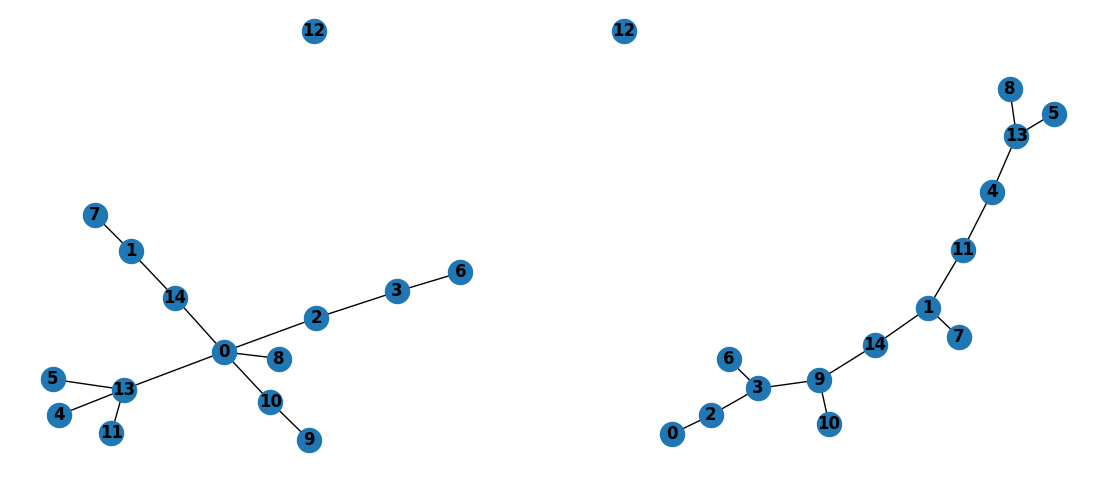

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(bfs_tree, ax=ax1, with_labels=True, font_weight="bold")
nx.draw(dfs_tree, ax=ax2, with_labels=True, font_weight="bold")

# Ejercicios

## Ejercicio 1

Escribe un algoritmo `num_connected(G)` que, dada una gráfica `G`, regrese el número de componentes conexas que tiene.

---

**Explicación:** en la función `num_connected()` se crea una lista de visitados para todos los nodos del grafo `G` y se inicializan con valores `false`. Se inicia un contador para las componentes en 0. A cotinuación, se itera por todos los nodos del grafo `G` con un ciclo for. Para cada nodo $v$ no visitado, se aplica DFS sobre $v$ y se aumenta el número de componentes conexas en 1. Al revisar los nodos, se ignoran los ya marcados y se sigue con la operación hasta terminar de revisar todos los nodos.

In [45]:
def num_connected(G):
    visited = [False] * len(G.nodes)
    num_components = 0
    for v in range(len(G.nodes)):
        if visited[v] == False:
            num_components = num_components + 1
            dfs(G, v, visited)
    return num_components

5

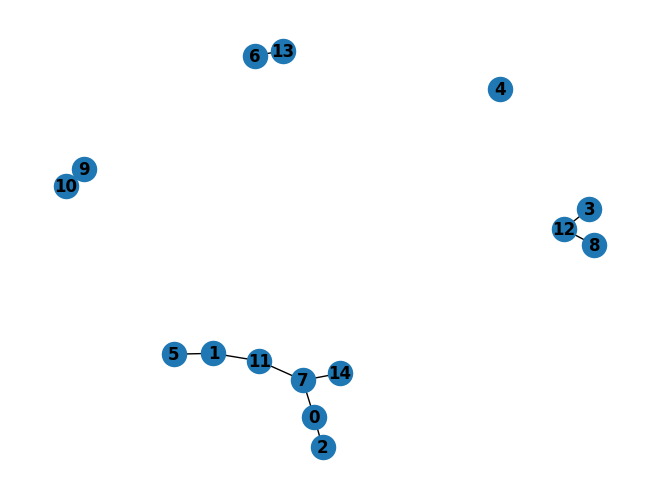

In [46]:
E = nx.gnp_random_graph(15, 1/9)
nx.draw(E, with_labels=True, font_weight='bold')
num_connected(E)

## Ejercicio 2

Dada una matriz de 0s y 1s, donde los 0s representan agua y los 1s tierra, escribe un algoritmo de NetworkX que cuente el número de *islas* que hay. Una isla se define como un conjunto de celdas de tierra conectadas por alguno de sus cuatro lados. Deberás escribir una función para convertir la matriz a una gráfica que la represente adecuadamente.

Por ejemplo, consideremos la siguiente matriz:

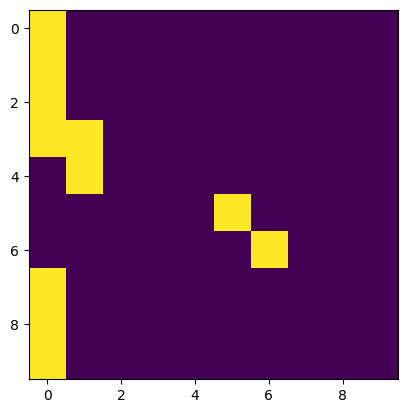

In [47]:
M = np.zeros((10, 10))
M[0, 0] = M[1, 0] = M[2, 0] = M[3, 0] = M[3, 1] = M[4, 1] = 1
M[5, 5] = 1
M[7, 0] = M[8, 0] = M[9, 0] = 1
M[6, 6] = 1

plt.imshow(M)

Tu función debe de regresar **4** islas (nota que las dos islas de la derecha están separadas, ya que solo se tocan diagonalmente).

-----------------
`graphify(grid)`:

**Parámetros**

`grid`: Una matriz tipo cuadrícula con 1s para representar tierra y 0s para representar agua

Crea un nuevo grafo `G`. Recorre la cuadrícula por fila y por columna; y si encuentra una coordenada con tierra, la agrega como vértice. Para cada vértice agregado al grafo, revisa si sus adyacentes (fila anterior y columna anterior) tienen tierra también. De ser así, se agrega una arista conectando ambos nodos.

Después de convertir la cuadrícula en grafo, se renombran las etiquetas de las aristas desde 0 hasta $n-1$ donde $n$ es el número de nodos del grafo. Dado que no nos importa el orden en que se recorra el grafo, se realiza esto para hacer que el grafo generado con esta función sea compatible con la función de `DFS` implementada anteriormente.

**Retorna**

`H`: Un grafo isomorfo a `G` con nodos iterables por `DFS` 

In [48]:
def graphify(grid):
    G = nx.Graph()
    n, m = grid.shape
    for i in range(n):
        for j in range(m):
            if grid[i, j] == 1:
                G.add_node((i, j))
                if i > 0 and grid[i-1, j] == 1:
                    G.add_edge((i, j), (i-1, j))
                if j > 0 and grid[i, j-1] == 1:
                    G.add_edge((i, j), (i, j-1))
    nx.draw(G, with_labels=True, font_weight='bold')
    # Mapping coordinates labels to integers
    H = nx.relabel_nodes(G, {y: x for x, y in enumerate(G.nodes)})
    return H

`count_islands(grid)`:

**Parámetros**

`grid`: Una matriz tipo cuadrícula con 1s para representar tierra y 0s para representar agua

El funcionamiento de esta función es análogo al algoritmo para contar componentes conexas.

**Retorna**

`islands`: El número de islas (componentes conexas) encontradas 

In [49]:
def count_islands(grid):
    G = graphify(grid)
    islands = 0
    visited = [False] * len(G.nodes)
    for v in G.nodes:
        if not visited[v]:
            islands += 1
            dfs(G, v, visited)
    return islands

4

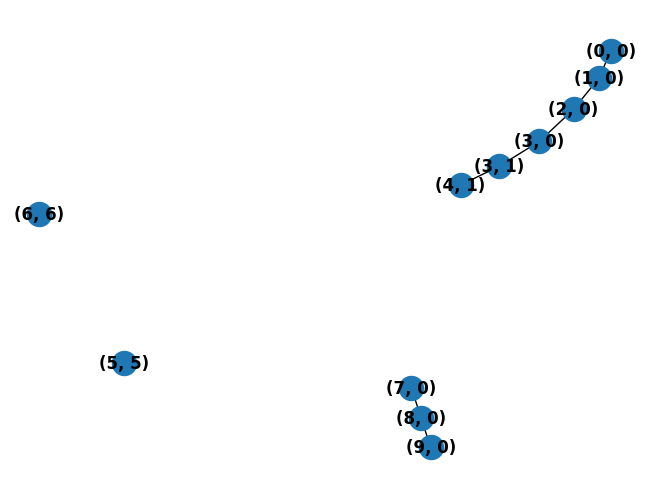

In [50]:
count_islands(M)

Otro caso de prueba:

In [51]:
grid = np.array([
    [1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 1, 0]
])

2

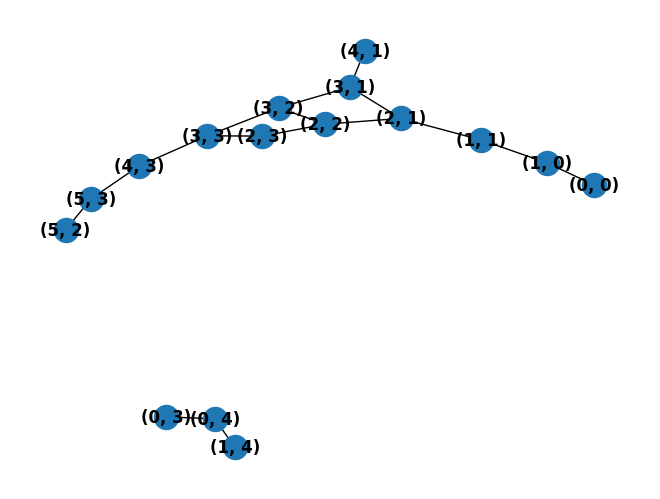

In [55]:
count_islands(grid)

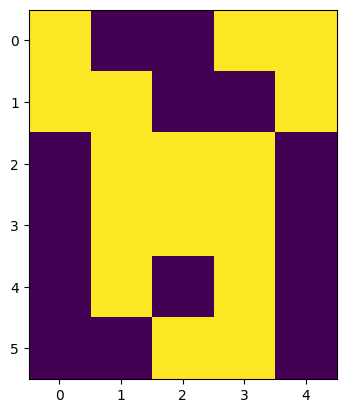

In [53]:
plt.imshow(grid)